# Exploratory Data Analysis 
## References: https://www.kaggle.com/dgawlik/house-prices-eda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Step1: Load data

* using skipinitialspace to remove extra space
* using na_value to see ? as NA

In [59]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', skipinitialspace=True, na_values="?")
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.describe()
df.sample(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
30678,51,Private,182944,HS-grad,9,Widowed,Tech-support,Unmarried,Black,Female,0,0,40,United-States,<=50K
10411,31,Private,219318,HS-grad,9,Never-married,Adm-clerical,Unmarried,White,Female,0,0,35,Puerto-Rico,<=50K
2262,31,Private,54929,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,60,United-States,<=50K
18810,41,Private,343944,11th,7,Widowed,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K


## 2. EDA:
Target is income >50K or <=50K

### Age distribution

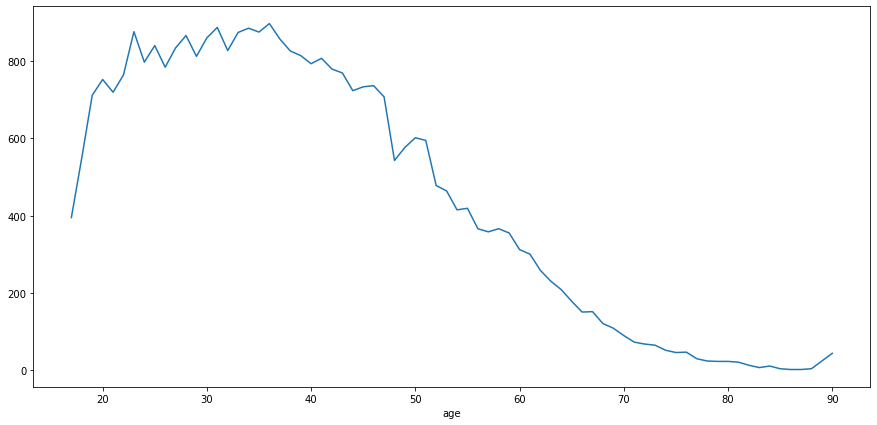

In [3]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['age']).count()['income'].plot(ax=ax)

## Quantitative vs Qualitative

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [5]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
{'Quantitative': quantitative}

{'Quantitative': ['age',
  'fnlwgt',
  'education_num',
  'capital_gain',
  'capital_loss',
  'hours_per_week']}

## Quantitative: have 6 number columns:
* **age:** 17-90
* **fnlwgt:** is sampling weight, we just avoid it now for the simple
* **education_num:** 1-16 years of education
* **capital_gain:** capital gain beside salary
* **capital_loss:** capital lost beside salary
* **hour_per_week**

In [6]:
df.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
6030,61,Self-emp-inc,227232,Bachelors,13,Separated,Sales,Not-in-family,White,Female,0,0,30,United-States,<=50K
12233,27,Private,171655,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,42,United-States,<=50K
26472,34,Self-emp-not-inc,349148,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
17946,41,Private,97632,Some-college,10,Divorced,Sales,Not-in-family,Asian-Pac-Islander,Female,0,0,32,United-States,<=50K
25035,65,Private,153522,HS-grad,9,Widowed,Other-service,Unmarried,White,Female,0,0,17,United-States,<=50K


In [7]:
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']
{'Qualitative:': qualitative}

{'Qualitative:': ['workclass',
  'education',
  'marital_status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native_country',
  'income']}

## Qualitative: have 9 category columns:
* **workclass:**
* **education:**
* **marital_status:**
* **occupation:**
* **relationship:**
* **race:**
* **sex:**
* **native_country:**
* **income:** : target column

### With unique values

In [38]:
print(df['workclass'].unique())
print(df['education'].unique())
print(df['marital_status'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['sex'].unique())
print(df['native_country'].unique())
print(df['income'].unique()         )   

['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Husband' 'Not-in-family' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
[1 0]
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'L

## Missing data

native_country     583
workclass         1836
occupation        1843
dtype: int64

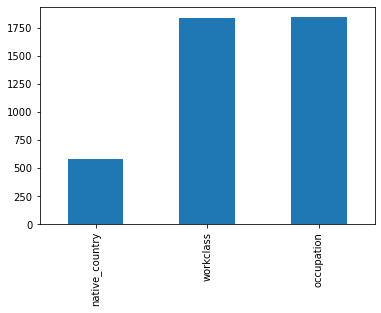

In [39]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
missing

## Transform

In [62]:
# cleaned_df = df.copy('true').dropna(axis=0)
def encode_income(df):
    df.income = df.income.apply(lambda x:0 if x=='<=50K' else 1 if x=='>50K' else x)
    return df

def encode_sex(df):
    df.sex = df.sex.apply(lambda x:0 if x=='Female' else 1 if x=='Male' else x)
    return df


def simplify_ages(df):
    bins = (16, 20, 30, 40, 50, 60, 70, 80, 90)
    group_names = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
    categories = pd.cut(df.age, bins, labels=group_names)
    df['transform_age'] = categories
    return df

def simplify_workhours(df):
    bins = (0, 40,  90)
    group_names = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
    categories = pd.cut(df.age, bins, labels=group_names)
    df['transform_age'] = categories
    return df

def transform_features(df):
    df = encode_income(df)
    df = encode_sex(df)
    df = simplify_ages(df)
    return df


tdf = transform_features(df)
tdf.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,transform_age
23692,22,Private,204226,HS-grad,9,Never-married,Exec-managerial,Own-child,White,0,0,0,40,United-States,0,21-30
18126,36,Private,484024,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,1,0,0,40,United-States,0,31-40
27577,64,NaN,200017,HS-grad,9,Widowed,NaN,Not-in-family,White,0,0,0,20,United-States,0,61-70
455,30,Private,180374,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,0,21-30
28151,19,Private,210308,Some-college,10,Never-married,Adm-clerical,Own-child,White,0,0,0,15,United-States,0,17-20


## Value Distribution
### Quantitative

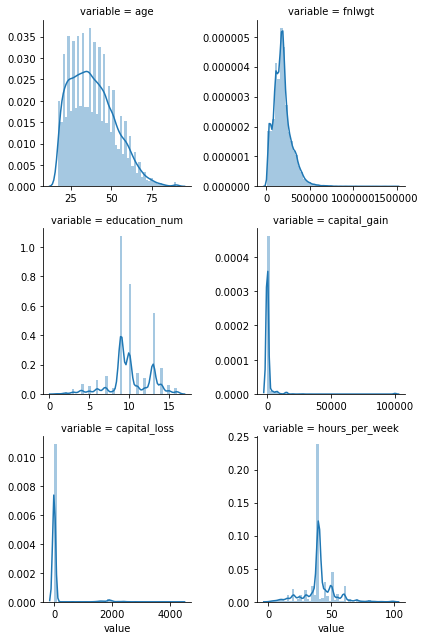

In [63]:
f = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

#### Numerice columns still not good distribution, could be better if do transformation (ex: log)

## Qualitative: 

## Income Colerration
### Age, age group

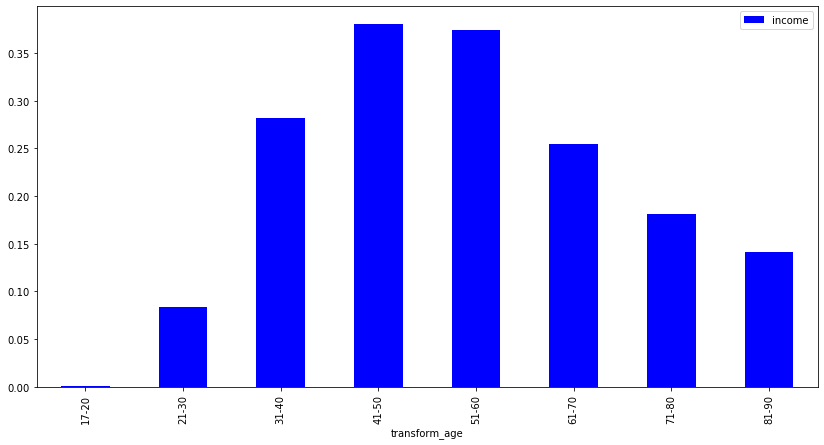

In [65]:
condition_pivot = df.pivot_table(index='transform_age', 
                                       values='income', aggfunc=np.mean)
ax = condition_pivot.plot(kind='bar', color='blue', figsize=(14, 7))

## Categories vs Income

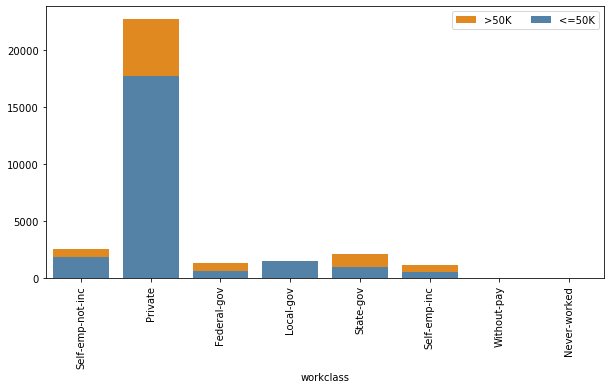

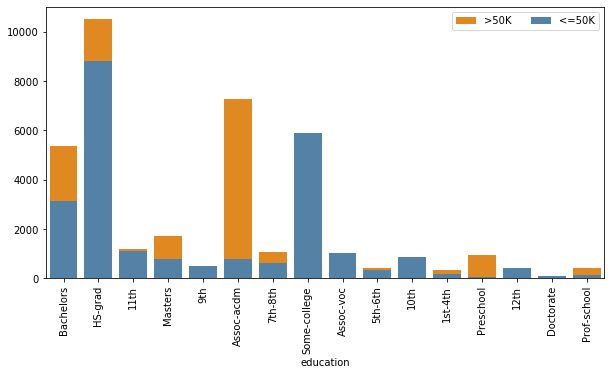

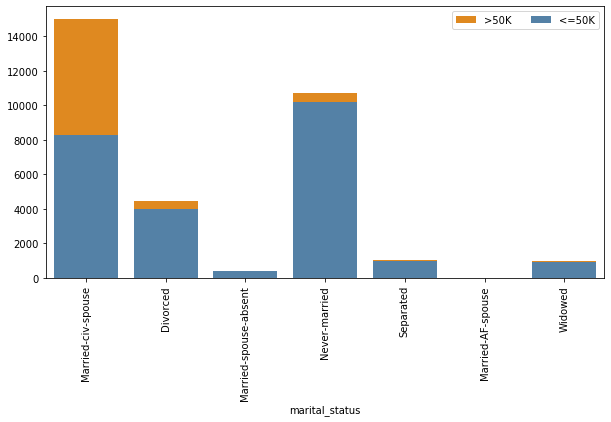

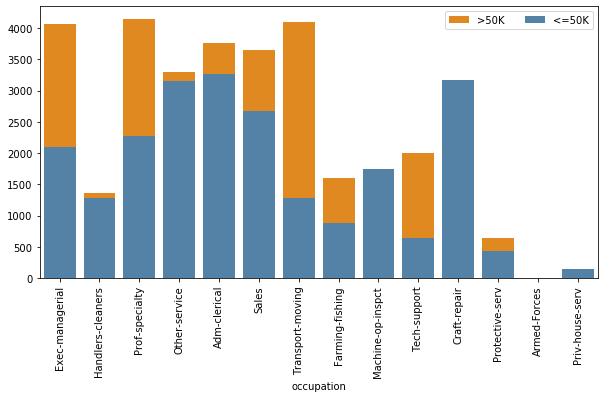

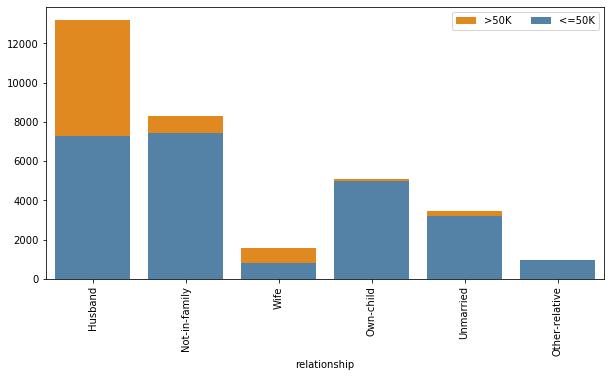

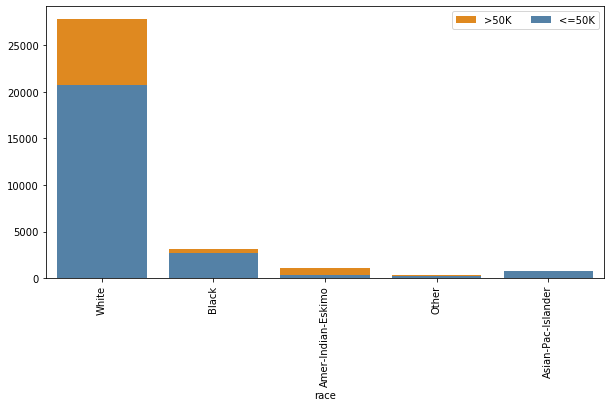

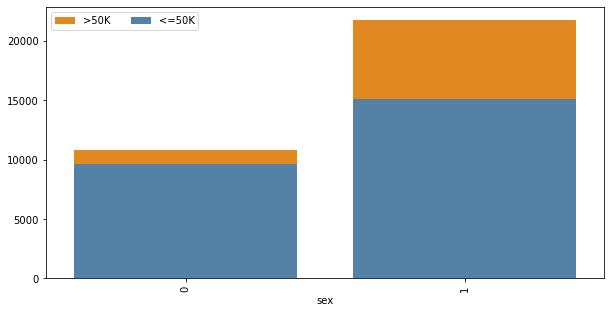

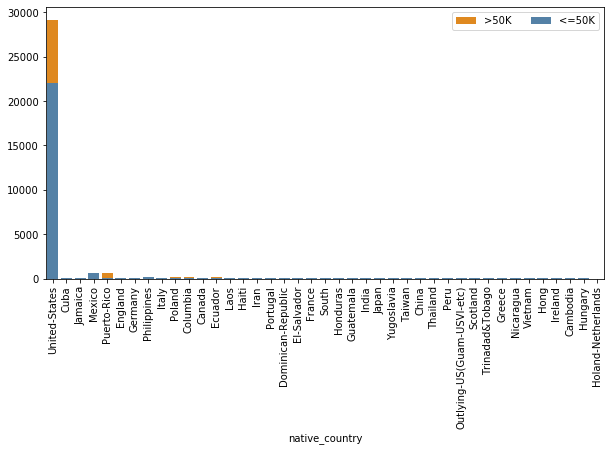

In [66]:
df_low_income = df[df['income'] == 0]
for col in qualitative[0:-1]:
    total_column = df[col].unique().size
    total_column
    f, ax = plt.subplots(figsize=(10, 5))
    plt.xticks(rotation=90)
    
    sns.countplot(x=col, data=df, color="darkorange", label=">50K")
    
    sns.countplot(x=col, data=df_low_income, color="steelblue", label="<=50K")
    
    max = df[col].value_counts().max()
    ax.set(ylim=(0, max * 1.05), ylabel="", xlabel=col)
    
#     # Add a legend and informative axis label
    ax.legend(ncol=2,  frameon=True)


#### We can see the most distribution of data and 50K higher is on:
* Private of workclass
* Hs-grad of graduate but Assoc-acdm has more >50K
* Married-civ-spouse of marital_status
* Husband of relationship
* White of race
* Male of sex
* Us of native_country

## 3. Feature engineer
### Feature Correlation Matrix

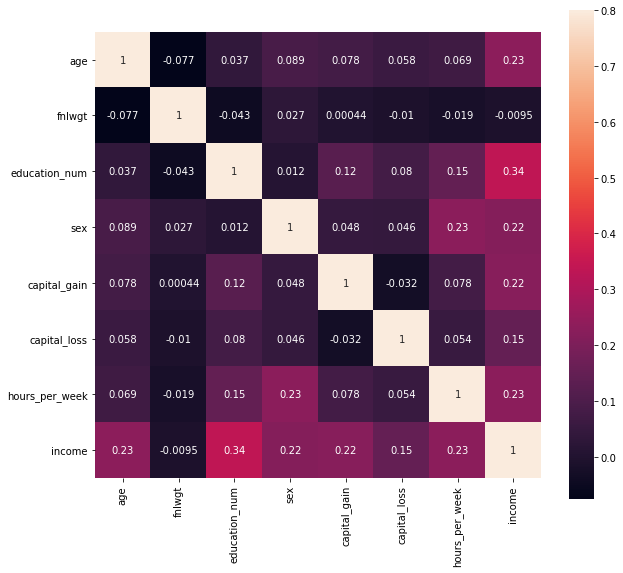

In [20]:
corrmat = tdf.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

Not suprise that the education_num has highest correlation
Then age and hour per week.

### Now including the categories columns has been label using get_dummies

In [74]:
df2 = df.copy()
df2 = pd.get_dummies(df2, columns=['occupation', 'race', 'workclass', 'marital_status', 'relationship'])

df2.corr().unstack().sort_values().drop_duplicates().filter(like='income', axis=0).tail(10)

income                             capital_loss                  0.150523
                                   occupation_Prof-specialty     0.185861
                                   occupation_Exec-managerial    0.214856
                                   sex                           0.215995
                                   capital_gain                  0.223333
                                   hours_per_week                0.229690
age                                income                        0.234039
education_num                      income                        0.335182
income                             relationship_Husband          0.401027
marital_status_Married-civ-spouse  income                        0.444688
dtype: float64

We can see income have good correlation with:
* marital_status_Married-civ-spouse, relationship_Husband, education_num, age, hours_per_week, capital_gain...

### Features Choosing
#### Quantitative:
* ✅**age:** 
* ❌**fnlwgt:**  is sampling weight, we just avoid it now for the simple
* ✅**education_num:**  1-16 years of education
* ✅**capital_gain:**  capital gain beside salary
* ✅**capital_loss:**  capital lost beside salary
* ✅**hour_per_week** 

#### Qualitative:
* ✅**workclass:**
* ❌~~**education:** ~~  this is redundace with education_num and
* ✅**marital_status:**  
* ✅**occupation:** 
* ✅**relationship:** 
* ✅**race:** 
* ✅**sex:** 
* ❌~~**native_country:**~~  remove due to most of instance is US
* 🌟**income:** target column that answer you win or lose the bet